In [ ]:
!pip install librosa

In [ ]:
%%bash
unzip images1.zip
rm images1.zip
unzip images2.zip
rm images2.zip

In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image, ImageReadMode
import torchvision
from sklearn.metrics import label_ranking_average_precision_score
from PIL import Image
import torchvision.transforms as transforms
from collections import defaultdict
import ast

%matplotlib inline

In [2]:
df = pd.read_csv('./data/muse_v3.csv', low_memory=False)
df.drop(df.index[10001:], axis=0, inplace=True)
df.dropna(subset=['spotify_id'])

filenames = []
for idx, row in df.iterrows():
    print(idx, end=",")
    filenames.append(f"{idx}_{row['spotify_id']}.mp3")

df["filename"] = filenames

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,27

,3977,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020,4021,4022,4023,4024,4025,4026,4027,4028,4029,4030,4031,4032,4033,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043,4044,4045,4046,4047,4048,4049,4050,4051,4052,4053,4054,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,4096,4097,4098,4099,4100,4101,4102,4103,4104,4105,4106,4107,4108,4109,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4123,4124,4125,4126,4127,4128,4129,4130,4131,4132,4133,4134,4135,4136,4137,4138,4139,4140,4141,4142,4143,4144,4145,4146,4147,4148,4149,4150,4151,4152,4153,4154,4155,4156,4157,4158,4159,4160,4161,4162,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172,4173,4174,4175,4176

,5832,5833,5834,5835,5836,5837,5838,5839,5840,5841,5842,5843,5844,5845,5846,5847,5848,5849,5850,5851,5852,5853,5854,5855,5856,5857,5858,5859,5860,5861,5862,5863,5864,5865,5866,5867,5868,5869,5870,5871,5872,5873,5874,5875,5876,5877,5878,5879,5880,5881,5882,5883,5884,5885,5886,5887,5888,5889,5890,5891,5892,5893,5894,5895,5896,5897,5898,5899,5900,5901,5902,5903,5904,5905,5906,5907,5908,5909,5910,5911,5912,5913,5914,5915,5916,5917,5918,5919,5920,5921,5922,5923,5924,5925,5926,5927,5928,5929,5930,5931,5932,5933,5934,5935,5936,5937,5938,5939,5940,5941,5942,5943,5944,5945,5946,5947,5948,5949,5950,5951,5952,5953,5954,5955,5956,5957,5958,5959,5960,5961,5962,5963,5964,5965,5966,5967,5968,5969,5970,5971,5972,5973,5974,5975,5976,5977,5978,5979,5980,5981,5982,5983,5984,5985,5986,5987,5988,5989,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999,6000,6001,6002,6003,6004,6005,6006,6007,6008,6009,6010,6011,6012,6013,6014,6015,6016,6017,6018,6019,6020,6021,6022,6023,6024,6025,6026,6027,6028,6029,6030,6031

,7565,7566,7567,7568,7569,7570,7571,7572,7573,7574,7575,7576,7577,7578,7579,7580,7581,7582,7583,7584,7585,7586,7587,7588,7589,7590,7591,7592,7593,7594,7595,7596,7597,7598,7599,7600,7601,7602,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612,7613,7614,7615,7616,7617,7618,7619,7620,7621,7622,7623,7624,7625,7626,7627,7628,7629,7630,7631,7632,7633,7634,7635,7636,7637,7638,7639,7640,7641,7642,7643,7644,7645,7646,7647,7648,7649,7650,7651,7652,7653,7654,7655,7656,7657,7658,7659,7660,7661,7662,7663,7664,7665,7666,7667,7668,7669,7670,7671,7672,7673,7674,7675,7676,7677,7678,7679,7680,7681,7682,7683,7684,7685,7686,7687,7688,7689,7690,7691,7692,7693,7694,7695,7696,7697,7698,7699,7700,7701,7702,7703,7704,7705,7706,7707,7708,7709,7710,7711,7712,7713,7714,7715,7716,7717,7718,7719,7720,7721,7722,7723,7724,7725,7726,7727,7728,7729,7730,7731,7732,7733,7734,7735,7736,7737,7738,7739,7740,7741,7742,7743,7744,7745,7746,7747,7748,7749,7750,7751,7752,7753,7754,7755,7756,7757,7758,7759,7760,7761,7762,7763,7764

,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327,9328,9329,9330,9331,9332,9333,9334,9335,9336,9337,9338,9339,9340,9341,9342,9343,9344,9345,9346,9347,9348,9349,9350,9351,9352,9353,9354,9355,9356,9357,9358,9359,9360,9361,9362,9363,9364,9365,9366,9367,9368,9369,9370,9371,9372,9373,9374,9375,9376,9377,9378,9379,9380,9381,9382,9383,9384,9385,9386,9387,9388,9389,9390,9391,9392,9393,9394,9395,9396,9397,9398,9399,9400,9401,9402,9403,9404,9405,9406,9407,9408,9409,9410,9411,9412,9413,9414,9415,9416,9417,9418,9419,9420,9421,9422,9423,9424,9425,9426,9427,9428,9429,9430,9431,9432,9433,9434,9435,9436,9437,9438,9439,9440,9441,9442,9443,9444,9445,9446,9447,9448,9449,9450,9451,9452,9453,9454,9455,9456,9457,9458,9459,9460,9461,9462,9463,9464,9465,9466,9467,9468,9469,9470,9471,9472,9473,9474,9475,9476,9477,9478,9479,9480,9481,9482,9483,9484,9485,9486,9487,9488,9489,9490,9491,9492,9493,9494,9495,9496,9497,9498,9499,9500,9501,9502,9503,9504,9505,9506,9507,9508,9509,9510,9511,9512,9513,9514,9515,9516,9517

In [3]:
indices = []

for index, row in df.iterrows():
    if not os.path.isfile(f"./images/{row['filename']}.png"):
        indices.append(index)

print(indices)
df.drop(indices, inplace=True)

[10, 14, 16, 19, 22, 24, 28, 29, 31, 36, 40, 45, 52, 54, 55, 56, 78, 92, 109, 115, 118, 120, 124, 125, 133, 135, 138, 144, 145, 146, 151, 155, 157, 160, 166, 167, 168, 169, 173, 178, 180, 184, 193, 195, 198, 208, 211, 216, 219, 220, 222, 223, 226, 230, 238, 239, 240, 242, 243, 244, 245, 248, 253, 256, 257, 260, 261, 265, 270, 272, 277, 280, 281, 284, 285, 287, 294, 297, 300, 302, 313, 315, 316, 318, 320, 325, 326, 328, 338, 345, 349, 350, 351, 352, 353, 354, 357, 359, 363, 364, 366, 370, 371, 375, 379, 380, 382, 383, 386, 387, 388, 391, 397, 401, 405, 406, 407, 416, 420, 421, 423, 434, 437, 438, 441, 446, 447, 448, 454, 456, 463, 471, 474, 476, 480, 485, 487, 488, 495, 496, 497, 498, 499, 502, 504, 506, 507, 509, 510, 517, 519, 525, 527, 530, 531, 532, 534, 535, 536, 543, 544, 548, 550, 552, 553, 554, 557, 558, 565, 566, 567, 569, 571, 574, 578, 580, 585, 586, 589, 590, 591, 592, 593, 595, 596, 599, 609, 610, 611, 612, 613, 627, 629, 632, 633, 636, 637, 640, 642, 648, 652, 655, 656, 65

In [4]:
df.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,filename
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,0_4xkOaSrkexMciUUogZKVTS.mp3
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,1_3fOc9x06lKJBhz435mInlH.mp3
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,2_3Y96xd4Ce0J47dcalLrEC8.mp3
3,https://www.last.fm/music/m.i.a./_/bamboo%2bbanga,Bamboo Banga,M.I.A.,"['aggressive', 'fun', 'sexy', 'energetic']",13,6.555071,5.537214,5.691357,99dd2c8c-e7c1-413e-8ea4-4497a00ffa18,6tqFC1DIOphJkCwrjVzPmg,hip-hop,3_6tqFC1DIOphJkCwrjVzPmg.mp3
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,4_5bU4KX47KqtDKKaLM4QCzh.mp3


In [5]:
def create_freq_dict(df):
    d = defaultdict(lambda: 0)
    for i, row in df.iterrows():
        for seed in ast.literal_eval(row["seeds"]):
            d[seed] += 1
    return d

d1 = create_freq_dict(df)
d1

defaultdict(<function __main__.create_freq_dict.<locals>.<lambda>()>,
            {'aggressive': 676,
             'fun': 27,
             'sexy': 60,
             'energetic': 78,
             'angry': 715,
             'bitter': 45,
             'epic': 61,
             'driving': 42,
             'intense': 746,
             'uplifting': 21,
             'fierce': 502,
             'soft': 27,
             'powerful': 108,
             'cold': 52,
             'gritty': 42,
             'warm': 14,
             'flowing': 11,
             'smooth': 24,
             'exciting': 23,
             'hostile': 26,
             'cathartic': 48,
             'fiery': 45,
             'raucous': 20,
             'ethereal': 80,
             'atmospheric': 112,
             'hypnotic': 60,
             'trippy': 49,
             'quirky': 42,
             'explosive': 107,
             'silly': 118,
             'sweet': 16,
             'nostalgic': 28,
             'tense': 78,
            

In [6]:
for k, v in d1.items():
    if v < 100:
        print(k)
        df = df[~df['seeds'].str.contains(k)]

d2 = create_freq_dict(df)
d2

fun
sexy
energetic
bitter
epic
driving
uplifting
soft
cold
gritty
warm
flowing
smooth
exciting
hostile
cathartic
fiery
raucous
ethereal
hypnotic
trippy
quirky
sweet
nostalgic
tense
technical
exotic
witty
volatile
urgent
dramatic
complex
reflective
searching
gutsy
rousing
bleak
soothing
positive
sentimental
strong
poignant
thoughtful
calm
confrontational
erotic
sexual
sensual
trashy
precious
lyrical
nihilistic
lively
cynical
carefree
cheerful
gleeful
playful
passionate
crunchy
gloomy
halloween
spooky
grim
nocturnal
delicate
gentle
eccentric
spiritual
theatrical
tragic
messy
peaceful
freewheeling
triumphant
springlike
spacey
brash
confident
rebellious
brooding
reckless
thuggish
detached
sleazy
lonely
sophisticated
savage
sprawling
street-smart
whimsical
anxious
demonic
mysterious
ecstatic
monumental
rowdy
acerbic
mystical
martial
optimistic
melancholy
sad
mellow
happy
yearning
introspective
wistful
visceral
romantic
bittersweet
nervous
sarcastic
relaxed
literate
malevolent
outrageous
sca

defaultdict(<function __main__.create_freq_dict.<locals>.<lambda>()>,
            {'aggressive': 549,
             'angry': 524,
             'powerful': 23,
             'dark': 461,
             'scary': 21,
             'eerie': 79,
             'harsh': 251,
             'hyper': 159,
             'explosive': 66,
             'provocative': 92,
             'negative': 95,
             'apocalyptic': 160,
             'silly': 72,
             'fierce': 409,
             'defiant': 38,
             'menacing': 133,
             'ominous': 172,
             'manic': 72,
             'unsettling': 40,
             'atmospheric': 39})

In [7]:
req_num = 300

for k, v in d2.items():
    if v > req_num:
#         remove_num = v - req_num
        print(k, v)
        word_rows = df[df['seeds'].str.contains(k)]
        modified_rows = word_rows.iloc[req_num:]
        df = pd.concat([df, modified_rows]).drop_duplicates(keep=False)

d3 = create_freq_dict(df)
d3

aggressive 549
angry 524
dark 461
fierce 409


defaultdict(<function __main__.create_freq_dict.<locals>.<lambda>()>,
            {'aggressive': 300,
             'angry': 300,
             'powerful': 16,
             'dark': 300,
             'scary': 19,
             'eerie': 78,
             'harsh': 240,
             'hyper': 158,
             'explosive': 66,
             'provocative': 92,
             'silly': 63,
             'fierce': 300,
             'defiant': 38,
             'menacing': 133,
             'ominous': 172,
             'negative': 85,
             'apocalyptic': 159,
             'manic': 72,
             'unsettling': 40,
             'atmospheric': 33})

In [8]:
df.head()

,lastfm_url,track,artist,seeds,number_of_emotion_tags,valence_tags,arousal_tags,dominance_tags,mbid,spotify_id,genre,filename
0,https://www.last.fm/music/eminem/_/%2527till%2...,'Till I Collapse,Eminem,['aggressive'],6,4.550000,5.273125,5.690625,cab93def-26c5-4fb0-bedd-26ec4c1619e1,4xkOaSrkexMciUUogZKVTS,rap,0_4xkOaSrkexMciUUogZKVTS.mp3
1,https://www.last.fm/music/metallica/_/st.%2banger,St. Anger,Metallica,['aggressive'],8,3.710000,5.833000,5.427250,727a2529-7ee8-4860-aef6-7959884895cb,3fOc9x06lKJBhz435mInlH,metal,1_3fOc9x06lKJBhz435mInlH.mp3
2,https://www.last.fm/music/rick%2bross/_/speedi...,Speedin',Rick Ross,['aggressive'],1,3.080000,5.870000,5.490000,NaN,3Y96xd4Ce0J47dcalLrEC8,rap,2_3Y96xd4Ce0J47dcalLrEC8.mp3
4,https://www.last.fm/music/dope/_/die%2bmf%2bdie,Die MF Die,Dope,['aggressive'],7,3.771176,5.348235,5.441765,b9eb3484-5e0e-4690-ab5a-ca91937032a5,5bU4KX47KqtDKKaLM4QCzh,metal,4_5bU4KX47KqtDKKaLM4QCzh.mp3
5,https://www.last.fm/music/drowning%2bpool/_/st...,Step Up,Drowning Pool,['aggressive'],9,2.971389,5.537500,4.726389,49e7b4d2-3772-4301-ba25-3cc46ceb342e,4Q1w4Ryyi8KNxxaFlOQClK,metal,5_4Q1w4Ryyi8KNxxaFlOQClK.mp3


In [ ]:
# err = []

# for idx, row in tqdm(df.iloc[1064:].iterrows(), total=len(df)):
#     try:
#         filename = row["filename"]
#         y, sr = librosa.load(f'./tracks/{filename}', sr=None)
#         mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2560, hop_length=512, n_mels=128, fmin=20, fmax=22050)
#         mel_db = librosa.power_to_db(mel, ref=np.max)

#         # Convert the mel spectrogram to an image, and save
#         fig, ax = plt.subplots()
#         ax.axes.get_xaxis().set_visible(False)
#         ax.axes.get_yaxis().set_visible(False)
#         ax.set_frame_on(False)
#         librosa.display.specshow(mel_db, sr=sr)
#         plt.savefig(f"./images/{row['filename']}.png", dpi=400, bbox_inches='tight', pad_inches=0)
#         plt.close('all')
#     except Exception as e:
#         err.append(idx)

# with open('err.txt', 'w') as file:
#     file.write(str(err))

In [9]:
y = [f.translate(str.maketrans('', '', ' []\'')).split(',') for f in df['seeds']]

mlb = MultiLabelBinarizer()
labels_mlb = mlb.fit_transform(y)

# Save to file
df[mlb.classes_] = labels_mlb
df.to_csv('./data/muse_v3_encoded.csv', index=False)

In [10]:
print(mlb.classes_)
print(len(mlb.classes_))

['aggressive' 'angry' 'apocalyptic' 'atmospheric' 'dark' 'defiant' 'eerie'
 'explosive' 'fierce' 'harsh' 'hyper' 'manic' 'menacing' 'negative'
 'ominous' 'powerful' 'provocative' 'scary' 'silly' 'unsettling']
20


In [11]:
num_seeds = len(mlb.classes_)
num_seeds

20

In [12]:
data = pd.read_csv('./data/muse_v3_encoded.csv')

In [13]:
# indices = []

# for index, row in data.iterrows():
#     if not os.path.isfile(f"./images/{row['filename']}.png"):
#         indices.append(index)

# print(indices)
# data.drop(indices, inplace=True)

In [14]:
d4 = create_freq_dict(data)
d4

defaultdict(<function __main__.create_freq_dict.<locals>.<lambda>()>,
            {'aggressive': 300,
             'angry': 300,
             'powerful': 16,
             'dark': 300,
             'scary': 19,
             'eerie': 78,
             'harsh': 240,
             'hyper': 158,
             'explosive': 66,
             'provocative': 92,
             'silly': 63,
             'fierce': 300,
             'defiant': 38,
             'menacing': 133,
             'ominous': 172,
             'negative': 85,
             'apocalyptic': 159,
             'manic': 72,
             'unsettling': 40,
             'atmospheric': 33})

In [15]:
train_idx, valid_idx = train_test_split(np.arange(len(data)), test_size=0.25, random_state=42)
train_df = data.iloc[train_idx]
valid_df = data.iloc[valid_idx]

train_df.to_csv('./data/muse_v3_encoded_train.csv', index=False)
valid_df.to_csv('./data/muse_v3_encoded_test.csv', index=False)

In [16]:
class MultiLabelDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, low_memory=False)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, df.columns.get_loc("filename")])
        image = read_image(f'{img_path}.png', mode=ImageReadMode.RGB)
        labels = self.img_labels.iloc[idx, df.columns.get_loc("filename")+1:].to_numpy()
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            labels = self.target_transform(labels)
        return image, labels.astype(np.float32)


In [17]:
# def load_multilabel_images(img_dir, train_csv, valid_csv, transforms, batch_size=32, num_workers=0):

def load_multilabel_images(img_dir, train_csv, valid_csv, batch_size=32, num_workers=0):
    # train_data = MultiLabelDataset(train_csv, img_dir, transform=transforms['train'])
    # valid_data = MultiLabelDataset(valid_csv, img_dir, transform=transforms['valid'])

    train_data = MultiLabelDataset(train_csv, img_dir)
    valid_data = MultiLabelDataset(valid_csv, img_dir)

    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    valid_dataloader = DataLoader(
        valid_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )

    return train_dataloader, valid_dataloader


In [18]:
torch.set_grad_enabled(True)

In [19]:
data_dir = './images'
train_csv = './data/muse_v3_encoded_train.csv'
valid_csv = './data/muse_v3_encoded_test.csv'

# train_dl, valid_dl = load_multilabel_images(img_dir=data_dir, train_csv=train_csv, valid_csv=valid_csv, transforms=data_transforms, batch_size=32, num_workers=0)
train_dl, valid_dl = load_multilabel_images(img_dir=data_dir, train_csv=train_csv, valid_csv=valid_csv, batch_size=8, num_workers=0)

In [20]:
def create_convnext_tiny(out_features, device):
    weights = torchvision.models.ConvNeXt_Tiny_Weights.DEFAULT
    model = torchvision.models.convnext_tiny(weights=weights).to(device)

    for param in model.features.parameters():
        param.requires_grad = False

    model.classifier = nn.Sequential(
        torchvision.models.convnext.LayerNorm2d((768,), eps=1e-06, elementwise_affine=True),
        nn.Flatten(start_dim=1, end_dim=-1),
        nn.Linear(in_features=768, out_features=out_features, bias=True)
    ).to(device)
    
    model.name = 'ConvNeXt Tiny'
    print(f'[INFO] Created new {model.name} model.')

    return model, weights

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model, weights = create_convnext_tiny(out_features=num_seeds, device=device)

[INFO] Created new ConvNeXt Tiny model.


In [21]:
def train_step_lrap(model, dataloader, loss_fn, optimizer, device):
    model.train()
    train_loss, train_lrap = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        X, y = X.to(torch.float32), y.to(torch.float32)    
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_lrap += label_ranking_average_precision_score(y.cpu(), torch.sigmoid(y_pred).detach().cpu().numpy())

    train_loss = train_loss / len(dataloader)
    train_lrap = train_lrap / len(dataloader)

    
    return train_loss, train_lrap

def validate_step_lrap(model, dataloader, loss_fn, device):
    model.eval()
    val_loss, val_lrap = 0, 0

    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            X, y = X.to(torch.float32), y.to(torch.float32)
            
            y_pred = model(X)
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()

            val_lrap += label_ranking_average_precision_score(y.cpu(), torch.sigmoid(y_pred).detach().cpu().numpy())

    val_loss = val_loss / len(dataloader)
    val_lrap = val_lrap / len(dataloader)

    return val_loss, val_lrap

In [22]:
num_epochs = 10
optimizer = optim.Adam(model.parameters(), lr=1e-05)
loss_func = nn.BCEWithLogitsLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [54]:
for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss, train_lrap = train_step_lrap(model, train_dl, loss_func, optimizer, device)

    avg_train_loss = train_loss / len(train_dl)
    avg_train_lrap = train_lrap / len(train_dl)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train LRAP: {avg_train_lrap:.4f}')

    # Validation
    model.eval()
    with torch.no_grad():
        val_loss, val_lrap = validate_step_lrap(model, valid_dl, loss_func, device)

    print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation LRAP: {val_lrap:.4f}')

print('Training finished.')

Epoch [1/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [1/10], Validation Loss: 0.1906, Validation LRAP: 0.4244
Epoch [2/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [2/10], Validation Loss: 0.1906, Validation LRAP: 0.4250
Epoch [3/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [3/10], Validation Loss: 0.1907, Validation LRAP: 0.4224
Epoch [4/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [4/10], Validation Loss: 0.1914, Validation LRAP: 0.4214
Epoch [5/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [5/10], Validation Loss: 0.1908, Validation LRAP: 0.4242
Epoch [6/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [6/10], Validation Loss: 0.1906, Validation LRAP: 0.4240
Epoch [7/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [7/10], Validation Loss: 0.1910, Validation LRAP: 0.4231
Epoch [8/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [8/10], Validation Loss: 0.1912, Validation LRAP: 0.4238
Epoch [9/10], Train Loss: 0.0009, Train LRAP: 0.0018
Epoch [9/10], Valid

In [55]:
save_path = './models/model_40ep_feb26_unskewed.pth'

# Save the model's state dictionary and other information
checkpoint = {
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}

torch.save(checkpoint, save_path)

print(f'Model saved at: {save_path}')

Model saved at: ./models/model_40ep_feb26_unskewed.pth


In [ ]:
# for epoch in range(num_epochs):
#     total_loss = 0.0
#     total_lrap = 0.0

#     # Training loop
#     for batch_data in train_dl:
#         X, y = batch_data
#         X, y = X.to(device), y.to(device)

#         train_loss, train_lrap = train_step_lrap(model, train_loader, criterion, optimizer, device)

#         # Accumulate the loss and lrap for monitoring
#         total_loss += train_loss.item()
#         total_lrap += train_lrap.item()

#     # Calculate average loss and lrap for the epoch
#     avg_loss = total_loss / len(train_loader)
#     avg_lrap = total_lrap / len(train_loader)

#     # Print or log the training statistics for the epoch
#     print(f'Epoch [{epoch+1}/{num_epochs}], Avg. Loss: {avg_loss:.4f}, Avg. LRAP: {avg_lrap:.4f}')

# # Training complete
# print('Training finished.')

## Sample Testing

In [ ]:
# test_file_path = './tracks/1539_3DivHejgz3x3dn1FkjHjWJ.mp3'
# audio_to_spectogram(test_file_path)

In [30]:
model_path = './models/model_30ep_feb26_unskewed.pth'
loaded_checkpoint = torch.load(model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model, _ = create_convnext_tiny(out_features=num_seeds, device=device)
model.load_state_dict(loaded_checkpoint['model_state_dict'])
model.to(device)
model.eval()

[INFO] Created new ConvNeXt Tiny model.


ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

Step Up ['aggressive']
./images/5_4Q1w4Ryyi8KNxxaFlOQClK.mp3.png


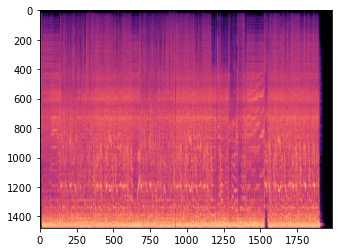

In [50]:
idx = 4
print(df.iloc[idx, df.columns.get_loc("track")], df.iloc[idx, df.columns.get_loc("seeds")])
image_path = f'./images/{df.iloc[idx, df.columns.get_loc("filename")]}.png'
print(image_path)

spectrogram_image = Image.open(image_path).convert('RGB')
plt.imshow(spectrogram_image)
plt.show()

In [51]:
height, width = 1478, 1984

# Apply the same transformations used during training
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])

input_tensor = transform(spectrogram_image).unsqueeze(0).to(device)

# Perform Inference
with torch.no_grad():
    output = model(input_tensor)

prediction = torch.argmax(output, dim=1).item()
print(prediction)
print(type(prediction))

9
<class 'int'>


In [52]:
class_labels = ['aggressive', 'angry', 'apocalyptic', 'atmospheric', 'dark', 'defiant', 'eerie',
 'explosive', 'fierce', 'harsh', 'hyper', 'manic', 'menacing', 'negative',
 'ominous', 'powerful', 'provocative', 'scary', 'silly', 'unsettling']

print(len(class_labels))

20


In [53]:
predicted_label = class_labels[prediction]
print(f'The model predicts class: {predicted_label}')

The model predicts class: harsh


In [ ]:
df.head()

In [ ]:
from collections import defaultdict
import ast

d = defaultdict(lambda: 0)
for i, row in df.iterrows():
    for seed in ast.literal_eval(row["seeds"]):
        d[seed] += 1

d